<a href="https://colab.research.google.com/github/Fatemah-Husain/Text-Classification-Basics-Workshop/blob/main/Text_Classification_Basics_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Arabic Text Classification Workshop #1 - Septemebr 21, 2022**
Prepared by Dr. Fatemah Husain (f.husain@ku.edu.kw) in collaboration with Google Developer Group - Kuwait (https://gdg.community.dev/gdg-kuwait/), Information Science Lab (https://infoscilab.ku.edu.kw/), Women Techmakers - Kuwait (https://wtmkuwait.com/), and ArabWic - Kuwait (https://www.instagram.com/arabwickw/?hl=en). 






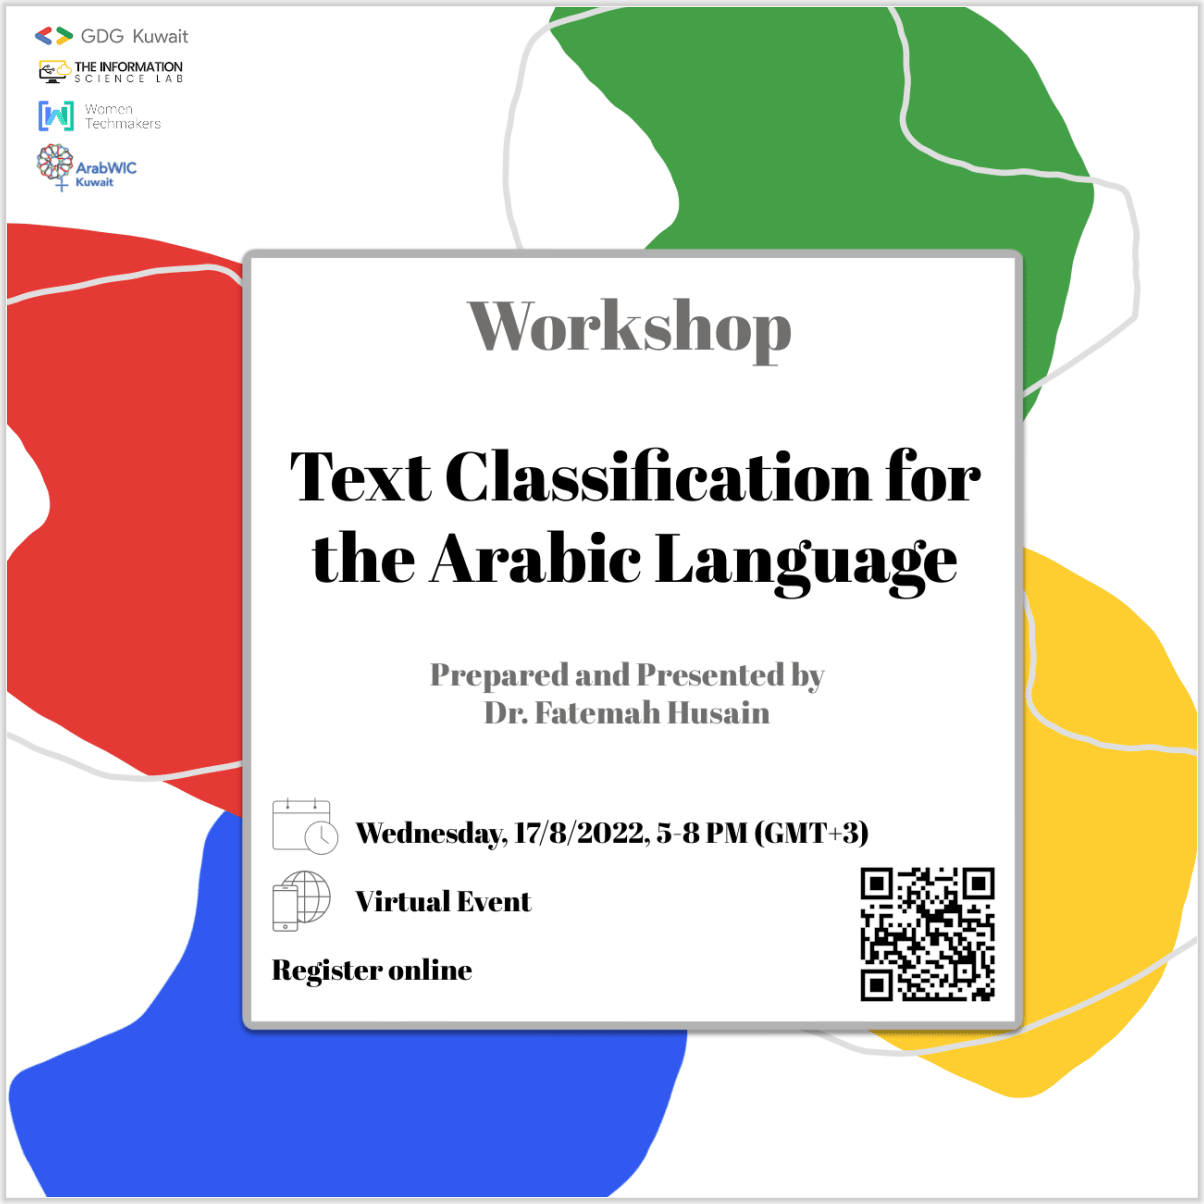

For more information about the workshop, please check this GitHub repository https://github.com/Fatemah-Husain 


This workshop covers the basics of text classification with a focus on processing and analyzing the Arabic text. Text classification includes several tasks, however, in this workshop we focus on text classification for offensive language detection. This Colab project includes the script used during the workshop. The followings are the main steps required to develop the classification system:



1.   Reading dataset
2. Exploratory data analysis
3.   Text preprocessing 
4. Preparing the dataset
5. Classification model development
6. Performance evaluation
7. Error analysis 


## **Step 1: Reading Dataset**

You need to download the dataset from this website:

https://github.com/Hala-Mulki/L-HSAB-First-Arabic-Levantine-HateSpeech-Dataset

The dataset contains tweets with labels; abusive, hate, or normal.

More details instructions to download the file:
1. Go to Datast.
2. Go to L-HSAB.
3. Click Raw .
4. Right-click the page and click Save as.
5. Name the file as L-HSAB.tsv.

after downloading the dataset to your computer, you will need to upload it to this Colab project using the Files menu on the left.

In [1]:
# Libraries needed to read the files
import pandas as pd

# Reading the dataset 
dataset = pd.read_csv("L-HSAB.tsv",sep='\t', header = 0)

# Viewing the data to check its format
dataset

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive
...,...,...
5841,أمير المليشيا مش خائن,normal
5842,صدقت يناسبك جدا جدا,normal
5843,لبخليني حب باسيل شغلتين,normal
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,hate


## **Step 2: Exploratory Data Analysis**

In this step, we will analyze the data to better understand its content. The following tasks are included in this step:

1. Counting the number of words per tweet.
2. Counting the number of characters per tweet.
3. The average number of characters per word.
4. Counting the number of stop words per tweet.
5. Counting the number of emoji per tweet.
6. Overall dataset statistics.

In [2]:
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Required libraries
!pip install emoji
import emoji
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))
#from nltk.corpus import stopwords


# Text length analysis 
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

# Counting emoji
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

dataset['word_count'] = dataset['Tweet'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['Tweet'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['Tweet'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset['emoji_count'] = dataset['Tweet'].apply(lambda x: emoji_counter(x))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 2.1 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=276be9aa42a05eefa0a070e726e0107ffa064eb7ef9a4eb89705a5239d184911
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count
2737,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,normal,52,236,3.854167,12,0
3581,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,normal,52,252,3.865385,19,0
3894,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...,abusive,51,226,3.450980,15,0
4124,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...,abusive,50,257,4.160000,6,0
2738,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...,abusive,50,235,4.043478,9,0


In [3]:
# Overall averages of each numeric column 
dataset_stat = dataset.mean(axis=0)
dataset_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


word_count           12.760178
char_count           63.592713
avg_char_per_word     4.306385
stopwords             2.164215
emoji_count           0.014027
dtype: float64

To further understand the content, we can download the data at this point and manually investigate it content before preprocessing.

In [ ]:
# to download the dataset
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

From the manual inspection, we can say that there are no retweets (RT), no mentions (@), and no hashtags (#). Thus, we will select the preprocessing techniques that better fit our task and dataset.

## **Step 3: Text Preprocessing**

We perform basic text preprocessing steps including the following:

1. Stop words removal
2. Normalization
3. Removing punctuations
4. Converting emoji
5. Noise removal


**Stop Words Removal:**

In [4]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

def stopRemoval(text):
    temptweet = word_tokenize(text)
    text = " ".join([w for w in temptweet if not w in stop and len(w) >= 2])
    return text

dataset['noStop_tweet'] = dataset['Tweet'].apply(lambda x:stopRemoval(x))
dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet
2737,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,normal,52,236,3.854167,12,0,يلا طلع بقلبك حدا معبرك مبارح كنت عم تهاجم ممو...
3581,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,normal,52,252,3.865385,19,0,لعنة الله قاتل السوريين ليش تتكلم اليمن لعنة ا...
3894,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...,abusive,51,226,3.450980,15,0,مش حق والله لأنك حمار بينعتب حق البيك الخلّاك ...
4124,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...,abusive,50,257,4.160000,6,0,العما بعيون عيونك شو انك حيوان وبهيم وعديم الا...
2738,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...,abusive,50,235,4.043478,9,0,خليكن بزقوا بعضكن اساس انت منزه عنصري اذا بدك ...
...,...,...,...,...,...,...,...,...
3399,آحا,normal,1,3,3.000000,0,0,آحا
1600,ياعاهرة,abusive,1,7,7.000000,0,0,ياعاهرة
701,حمير,hate,1,4,4.000000,0,0,حمير
3452,مشكور,normal,1,5,5.000000,0,0,مشكور


**Normalization:**

In [5]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    #text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics 
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

dataset['normalized_tweet'] = dataset['Tweet'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['text'] = dataset['noStop_tweet'].apply(lambda x:normalize(x))

dataset.head()

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text
2737,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,normal,52,236,3.854167,12,0,يلا طلع بقلبك حدا معبرك مبارح كنت عم تهاجم ممو...,ىلا طلع لى بقلبك ما حدا معبرك مبارح كنت عم تها...,ىلا طلع بقلبك حدا معبرك مبارح كنت عم تهاجم ممو...
3581,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,normal,52,252,3.865385,19,0,لعنة الله قاتل السوريين ليش تتكلم اليمن لعنة ا...,لعنه الله على قاتل السورىىن و لىش ما تتكلم عن ...,لعنه الله قاتل السورىىن لىش تتكلم الىمن لعنه ا...
3894,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...,abusive,51,226,3.450980,15,0,مش حق والله لأنك حمار بينعتب حق البيك الخلّاك ...,مش حق علىك والله لانك حمار ما بىنعتب علىك بس ح...,مش حق والله لانك حمار بىنعتب حق البىك الخلاك ت...
4124,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...,abusive,50,257,4.160000,6,0,العما بعيون عيونك شو انك حيوان وبهيم وعديم الا...,لك العما بعىون عىونك شو انك حىوان وبهىم وعدىم ...,العما بعىون عىونك شو انك حىوان وبهىم وعدىم الا...
2738,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...,abusive,50,235,4.043478,9,0,خليكن بزقوا بعضكن اساس انت منزه عنصري اذا بدك ...,خلىكن بزقوا ع بعضكن ع اساس انت منزه ىا عنصرى ا...,خلىكن بزقوا بعضكن اساس انت منزه عنصرى اذا بدك ...


**Removing Punctuations**

In [6]:
# Required libraries
import string 
import re

arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
englishPunctuations = string.punctuation # importing English punctuation marks
englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks

def removingPunctuation(text):
  cleanTweet = ''
  for i in text:
    if i not in arabicPunctuations:
      cleanTweet = cleanTweet + '' + i 
  return cleanTweet

dataset['noPunc_tweet'] = dataset['Tweet'].apply(lambda x: removingPunctuation(x))
dataset['text'] = dataset['text'].apply(lambda x: removingPunctuation(x))


dataset.sample(5)


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet
3008,يقطع عمرك ما ابشعك,abusive,5,19,3.750000,1,0,يقطع عمرك ابشعك,ىقطع عمرك ما ابشعك,ىقطع عمرك ابشعك,يقطع عمرك ما ابشعك
1598,يابنت لجنوب ما انت اول وحدة مع اسرائيل وضد الم...,abusive,25,124,4.000000,6,0,يابنت لجنوب انت اول وحدة اسرائيل وضد المقاومة ...,ىابنت لجنوب ما انت اول وحده مع اسرائىل وضد الم...,ىابنت لجنوب انت اول وحده اسرائىل وضد المقاومه ...,يابنت لجنوب ما انت اول وحدة مع اسرائيل وضد الم...
3128,ولك ليش حاطط بكعارو ههههه,normal,6,26,4.200000,0,0,ولك ليش حاطط بكعارو ههههه,ولك لىش حاطط بكعارو هه,ولك لىش حاطط بكعارو هه,ولك ليش حاطط بكعارو ههههه
4312,سد بوزك عماد عثمان أشرف من أن يتكلم امثالك عنه,abusive,11,47,3.700000,2,0,سد بوزك عماد عثمان أشرف يتكلم امثالك عنه,سد بوزك عماد عثمان اشرف من ان ىتكلم امثالك عنه,سد بوزك عماد عثمان اشرف ىتكلم امثالك عنه,سد بوزك عماد عثمان أشرف من أن يتكلم امثالك عنه
4576,صرت منبهك مليون مرة وئام ما بقى تاكل خرا,abusive,10,41,3.555556,1,0,صرت منبهك مليون مرة وئام بقى تاكل خرا,صرت منبهك ملىون مره وئام ما بقى تاكل خرا,صرت منبهك ملىون مره وئام بقى تاكل خرا,صرت منبهك مليون مرة وئام ما بقى تاكل خرا


**Converting Emoji**

This step is borrowed from this GitHub repository 

https://github.com/saobou/arabic-text-preprocessing/blob/master/Preprocess.ipynb 

You will need to download the file emoji.csv from this repository and upload it to this Colab or you can also fork the GitHub repository into this Colab project if you are familiar with using GitHub in Colab.

During this step emoji is translated from a pictogram to an Arabic text that explain its content. 

In [7]:
 with open('emojis.csv','r',encoding='utf-8') as f:
    lines = f.readlines()
    emojis_ar = {}
    for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})

In [8]:
from __future__ import unicode_literals # must be in the begining of the file

# Required libraries
!pip install unidecode
!pip install aiogoogletrans
!pip install emoji
import unicodedata
from unidecode import unidecode
import emoji
from aiogoogletrans import Translator
translator = Translator()
import asyncio
loop = asyncio.get_event_loop()


def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text



def emoji_native_translation(text):
    text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in ["\)", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["\(", "\[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["\(", "\[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in ["\)", "\]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText

def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False
    
def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

def translate_emojis(words):
    word_list = list()
    words_to_translate = list()
    for word in words :
        t = emojis_ar.get(word.get('emoji'),None)
        if t is None:
            word.update({'translation':'عادي','translated':True})
            #words_to_translate.append('normal')
        else:
            word.update({'translated':False,'translation':t})
            words_to_translate.append(t.replace(':','').replace('_',' '))
        word_list.append(word)
    return word_list

def emoji_unicode_translation(text):
    text = add_space(text)
    words = text.split()
    text_list = list()
    emojis_list = list()
    c = 0
    for word in words:
        if is_emoji(word):
            emojis_list.append({'emoji':word,'emplacement':c})
        else:
            text_list.append(word)
        c+=1
    emojis_translated = translate_emojis(emojis_list)
    for em in emojis_translated:
        text_list.insert(em.get('emplacement'),em.get('translation'))
    text = " ".join(text_list)
    return text
    
def clean_emoji(text):
    text = emoji_native_translation(text)
    text = emoji_unicode_translation(text)
    return text

dataset['cleanEmoji_tweet'] = dataset['Tweet'].apply(lambda x: clean_emoji(x))
dataset['text'] = dataset['text'].apply(lambda x: clean_emoji(x))


dataset.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.6 MB/s 
     |████████████████████████████████| 68 kB 4.6 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 80 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
  Created wheel for aiogoogletrans: filename=aiogoogletrans-3.3.3-py3-none-any.whl size=15715 sha256=8e276e1cf0812e1e0660b492f813440ae201f564df95766811791686052c06d5
  Stored in directory: /root/.cache/pip/wheels/4e/9d/20/e25d9fb46b799e9e4dc42cc0c44f2a2efe92761607aa60f220
Successfully built aiogoogletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet
2737,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,normal,52,236,3.854167,12,0,يلا طلع بقلبك حدا معبرك مبارح كنت عم تهاجم ممو...,ىلا طلع لى بقلبك ما حدا معبرك مبارح كنت عم تها...,ىلا طلع بقلبك حدا معبرك مبارح كنت عم تهاجم ممو...,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...,يلا طلع لي بقلبك ما حدا معبرك مبارح كنت عم تها...
3581,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,normal,52,252,3.865385,19,0,لعنة الله قاتل السوريين ليش تتكلم اليمن لعنة ا...,لعنه الله على قاتل السورىىن و لىش ما تتكلم عن ...,لعنه الله قاتل السورىىن لىش تتكلم الىمن لعنه ا...,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...,لعنة الله على قاتل السوريين و ليش ما تتكلم عن ...
3894,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...,abusive,51,226,3.450980,15,0,مش حق والله لأنك حمار بينعتب حق البيك الخلّاك ...,مش حق علىك والله لانك حمار ما بىنعتب علىك بس ح...,مش حق والله لانك حمار بىنعتب حق البىك الخلاك ت...,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...,مش حق عليك والله لأنك حمار ما بينعتب عليك بس ح...
4124,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...,abusive,50,257,4.160000,6,0,العما بعيون عيونك شو انك حيوان وبهيم وعديم الا...,لك العما بعىون عىونك شو انك حىوان وبهىم وعدىم ...,العما بعىون عىونك شو انك حىوان وبهىم وعدىم الا...,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...,لك العما بعيون عيونك شو انك حيوان وبهيم وعديم ...
2738,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...,abusive,50,235,4.043478,9,0,خليكن بزقوا بعضكن اساس انت منزه عنصري اذا بدك ...,خلىكن بزقوا ع بعضكن ع اساس انت منزه ىا عنصرى ا...,خلىكن بزقوا بعضكن اساس انت منزه عنصرى اذا بدك ...,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...,خليكن بزقوا ع بعضكن ع اساس انت منزه يا عنصري ا...


**Noise removal:** 

Noise includes miscellaneous items any content that might be redundant or not important to the task we are performing. In this example, removing digits and extra spaces were included.

In [9]:

def clean(text):
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    # Remove numbers
    text = re.sub("\d+", " ", text)
    return text

dataset['clean_tweet'] = dataset['Tweet'].apply(lambda x:clean(x))
dataset['text'] = dataset['text'].apply(lambda x:clean(x))


dataset.sample(5)

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet
3606,جبران عدونا,normal,2,11,5.000000,0,0,جبران عدونا,جبران عدونا,جبران عدونا,جبران عدونا,جبران عدونا,جبران عدونا
3395,وبمعنى آخرأكرم شهيب سدو لنيعك,abusive,5,29,5.000000,0,0,وبمعنى آخرأكرم شهيب سدو لنيعك,وبمعنى اخراكرم شهىب سدو لنىعك,وبمعنى اخراكرم شهىب سدو لنىعك,وبمعنى آخرأكرم شهيب سدو لنيعك,وبمعنى آخرأكرم شهيب سدو لنيعك,وبمعنى آخرأكرم شهيب سدو لنيعك
2241,شكرا أستاذ وهاب دمشق رائعه وشاعرنا النواب ذلك ...,normal,19,104,4.777778,3,0,شكرا أستاذ وهاب دمشق رائعه وشاعرنا النواب الرا...,شكرا استاذ وهاب دمشق رائعه وشاعرنا النواب ذلك ...,شكرا استاذ وهاب دمشق رائعه وشاعرنا النواب الرا...,شكرا أستاذ وهاب دمشق رائعه وشاعرنا النواب ذلك ...,شكرا أستاذ وهاب دمشق رائعه وشاعرنا النواب ذلك ...,شكرا أستاذ وهاب دمشق رائعه وشاعرنا النواب ذلك ...
1110,خليهم القوى الأمنيه كذالك الأمر يفتشو على الرخ...,normal,23,125,4.681818,3,0,خليهم القوى الأمنيه كذالك الأمر يفتشو الرخص ال...,خلىهم القوى الامنىه كذالك الامر ىفتشو على الرخ...,خلىهم القوى الامنىه كذالك الامر ىفتشو الرخص ال...,خليهم القوى الأمنيه كذالك الأمر يفتشو على الرخ...,خليهم القوى الأمنيه كذالك الأمر يفتشو على الرخ...,خليهم القوى الأمنيه كذالك الأمر يفتشو على الرخ...
2600,طيب نحكي منطق معقول الشيخ نعيم حسن يقول على ال...,normal,15,79,4.333333,1,0,طيب نحكي منطق معقول الشيخ نعيم حسن يقول الملأ ...,طىب نحكى منطق معقول الشىخ نعىم حسن ىقول على ال...,طىب نحكى منطق معقول الشىخ نعىم حسن ىقول الملا ...,طيب نحكي منطق معقول الشيخ نعيم حسن يقول على ال...,طيب نحكي منطق معقول الشيخ نعيم حسن يقول على ال...,طيب نحكي منطق معقول الشيخ نعيم حسن يقول على ال...


In [18]:
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Step 4: Preparing the Dataset**

In this step, the dataset will be splitted into a train set to develop the classifier and a test set to evaluate and test the classifier. It is always better to have a validation set, which help to adjust the parameters and setting of the experiments to boost the performance. However, for the purpose of this workshop, we will only have two sets; train and test. 

In [10]:
# required libraries
import pandas as pd
import csv
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# shuffle will help to reduce bias
dataset = shuffle(dataset)

# 20% test set and 80% train set
train, test = train_test_split(dataset, test_size=0.2,random_state=42)
train

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet
2181,خيّ نحنا ما منستاهلك و مش مقدرينك محلك مش بالج...,normal,13,64,4.333333,2,0,خيّ نحنا منستاهلك مش مقدرينك محلك مش بالجاهلية...,خى نحنا ما منستاهلك و مش مقدرىنك محلك مش بالجا...,خى نحنا منستاهلك مش مقدرىنك محلك مش بالجاهلىه ...,خيّ نحنا ما منستاهلك و مش مقدرينك محلك مش بالج...,خيّ نحنا ما منستاهلك و مش مقدرينك محلك مش بالج...,خيّ نحنا ما منستاهلك و مش مقدرينك محلك مش بالج...
4202,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس,hate,9,49,4.555556,0,0,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس,انو غرىب ىوجعك راسك القواتجىه عاده بىكونو بلا راس,انو غرىب ىوجعك راسك القواتجىه عاده بىكونو بلا راس,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس,انو غريب يوجعك راسك القواتجية عادة بيكونو بلا راس
3016,هيدول النازحين شو طينتهن يرجعوا ع بلدهن ولك ير...,hate,15,89,5.000000,1,0,هيدول النازحين شو طينتهن يرجعوا بلدهن ولك يرحم...,هىدول النازحىن شو طىنتهن ىرجعوا ع بلدهن ولك ىر...,هىدول النازحىن شو طىنتهن ىرجعوا بلدهن ولك ىرحم...,هيدول النازحين شو طينتهن يرجعوا ع بلدهن ولك ير...,هيدول النازحين شو طينتهن يرجعوا ع بلدهن ولك ير...,هيدول النازحين شو طينتهن يرجعوا ع بلدهن ولك ير...
1085,متشربين العنصرية لدرجة إنّو حتى لما بدهن يحكوا...,abusive,14,78,4.642857,2,0,متشربين العنصرية لدرجة إنّو بدهن يحكوا شي متطو...,متشربىن العنصرىه لدرجه انو حتى لما بدهن ىحكوا ...,متشربىن العنصرىه لدرجه انو بدهن ىحكوا شى متطور...,متشربين العنصرية لدرجة إنّو حتى لما بدهن يحكوا...,متشربين العنصرية لدرجة إنّو حتى لما بدهن يحكوا...,متشربين العنصرية لدرجة إنّو حتى لما بدهن يحكوا...
3913,روحي جيبي شرفك من نظام الأسد يا عجوز,abusive,8,36,3.625000,2,0,روحي جيبي شرفك نظام الأسد عجوز,روحى جىبى شرفك من نظام الاسد ىا عجوز,روحى جىبى شرفك نظام الاسد عجوز,روحي جيبي شرفك من نظام الأسد يا عجوز,روحي جيبي شرفك من نظام الأسد يا عجوز,روحي جيبي شرفك من نظام الأسد يا عجوز
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,ليك يا شعبان لا انت ولا الغريب معترف فيكم واذا...,normal,23,121,4.500000,4,0,ليك شعبان انت الغريب معترف فيكم واذا ميشال عَو...,لىك ىا شعبان لا انت ولا الغرىب معترف فىكم واذا...,لىك شعبان انت الغرىب معترف فىكم واذا مىشال عون...,ليك يا شعبان لا انت ولا الغريب معترف فيكم واذا...,ليك يا شعبان لا انت ولا الغريب معترف فيكم واذا...,ليك يا شعبان لا انت ولا الغريب معترف فيكم واذا...
4555,لما يطلع بوِجّك باب مسكّر ما تقول خِلصِت هون ل...,normal,15,72,3.866667,4,0,يطلع بوِجّك باب مسكّر تقول خِلصِت هون لأن الا ...,لما ىطلع بوجك باب مسكر ما تقول خلصت هون لان ال...,ىطلع بوجك باب مسكر تقول خلصت هون لان الا ىطلعل...,لما يطلع بوِجّك باب مسكّر ما تقول خِلصِت هون ل...,لما يطلع بوِجّك باب مسكّر ما تقول خِلصِت هون ل...,لما يطلع بوِجّك باب مسكّر ما تقول خِلصِت هون ل...
1742,التيار العوني كتير وزرا من عندهن عمبيغلطوا واه...,normal,20,119,5.000000,3,0,التيار العوني كتير وزرا عندهن عمبيغلطوا واهمهن...,التىار العونى كتىر وزرا من عندهن عمبىغلطوا واه...,التىار العونى كتىر وزرا عندهن عمبىغلطوا واهمهن...,التيار العوني كتير وزرا من عندهن عمبيغلطوا واه...,التيار العوني كتير وزرا من عندهن عمبيغلطوا واه...,التيار العوني كتير وزرا من عندهن عمبيغلطوا واه...
205,وأكبر دليل للي بصدقك يا ابن شعبان,normal,8,34,3.857143,1,0,وأكبر دليل للي بصدقك ابن شعبان,واكبر دلىل للى بصدقك ىا ابن شعبان,واكبر دلىل للى بصدقك ابن شعبان,وأكبر دليل للي بصدقك يا ابن شعبان,وأكبر دليل للي بصدقك يا ابن شعبان,وأكبر دليل للي بصدقك يا ابن شعبان


In [11]:
test

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet
1477,اديشك فزيعه بهالطله رعبتينا,normal,5,28,6.000000,0,0,اديشك فزيعه بهالطله رعبتينا,ادىشك فزىعه بهالطله رعبتىنا,ادىشك فزىعه بهالطله رعبتىنا,اديشك فزيعه بهالطله رعبتينا,اديشك فزيعه بهالطله رعبتينا,اديشك فزيعه بهالطله رعبتينا
4130,ههههههه داعشي طنط كول هوا ولاك حريمه,hate,7,36,4.285714,0,0,ههههههه داعشي طنط كول هوا ولاك حريمه,هه داعشى طنط كول هوا ولاك حرىمه,هه داعشى طنط كول هوا ولاك حرىمه,ههههههه داعشي طنط كول هوا ولاك حريمه,ههههههه داعشي طنط كول هوا ولاك حريمه,ههههههه داعشي طنط كول هوا ولاك حريمه
2395,ههههههههههيحزنني جدا ان مواليهم يصدقونهم,normal,6,41,7.200000,0,0,ههههههههههيحزنني جدا ان مواليهم يصدقونهم,ههىحزننى جدا ان موالىهم ىصدقونهم,ههىحزننى جدا ان موالىهم ىصدقونهم,ههههههههههيحزنني جدا ان مواليهم يصدقونهم,ههههههههههيحزنني جدا ان مواليهم يصدقونهم,ههههههههههيحزنني جدا ان مواليهم يصدقونهم
859,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,abusive,45,235,4.244444,14,0,المشكلة انو دكتاتور حقو فرنك عديم الرؤية الفهم...,المشكله انو دكتاتور حقو فرنك عدىم الرؤىه و الف...,المشكله انو دكتاتور حقو فرنك عدىم الرؤىه الفهم...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...
2588,منشن بلحة,normal,2,9,4.000000,0,0,منشن بلحة,منشن بلحه,منشن بلحه,منشن بلحة,منشن بلحة,منشن بلحة
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,لك تضرب شو ازعر يا خروف,abusive,6,23,3.000000,2,0,تضرب شو ازعر خروف,لك تضرب شو ازعر ىا خروف,تضرب شو ازعر خروف,لك تضرب شو ازعر يا خروف,لك تضرب شو ازعر يا خروف,لك تضرب شو ازعر يا خروف
1411,زمن التبعية والتعطيل،يتجسد في سياسة جبران باسيل,normal,7,47,5.857143,1,0,زمن التبعية والتعطيل،يتجسد سياسة جبران باسيل,زمن التبعىه والتعطىل،ىتجسد فى سىاسه جبران باسىل,زمن التبعىه والتعطىلىتجسد سىاسه جبران باسىل,زمن التبعية والتعطيليتجسد في سياسة جبران باسيل,زمن التبعية والتعطيل،يتجسد في سياسة جبران باسيل,زمن التبعية والتعطيل،يتجسد في سياسة جبران باسيل
5735,شي بيهوي من هيك بهايم\n,abusive,5,22,3.400000,1,0,شي بيهوي هيك بهايم,شى بىهوى من هىك بهاىم\n,شى بىهوى هىك بهاىم,شي بيهوي من هيك بهايم\n,شي بيهوي من هيك بهايم,شي بيهوي من هيك بهايم
3736,عشانك حمارة,abusive,2,11,5.000000,0,0,عشانك حمارة,عشانك حماره,عشانك حماره,عشانك حمارة,عشانك حمارة,عشانك حمارة


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


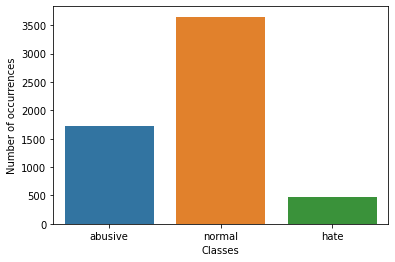

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(dataset.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


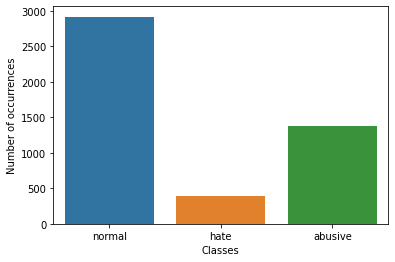

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


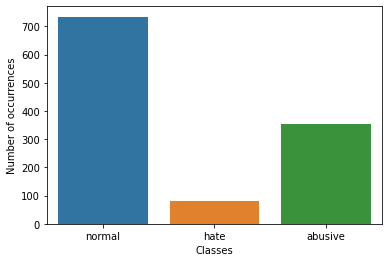

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(test.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

It is important to make sure that all sets have similar distribution of classes as it the case in this example. We will also need to convert the lbels from categorical type to numeric type.

In [15]:
# convert labels from categorical to numeric
label_map = {
    'normal' : 0,
    'abusive': 1,
    'hate' : 2
}

train['Offensive'] = train['Class'].apply(lambda x: label_map[x])
test['Offensive'] = test['Class'].apply(lambda x: label_map[x])


We only need the fully preprocessed text and the numeric label to be passed to the next step.

# **Step 5: Classification Model Development**

During this step, the classifier is created using the training set and is used to predict the labels of the testing set. For the purpose of this workshop, we only develop one traditional machine learning classifier, which is the logistic regression.

In [17]:
# required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


# Feature extraction
train_feature = train.text
train_target = train.Offensive

test_feature = test.text
test_target = test.Offensive

# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())

# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(train_feature,train_target)

# make prediction and print accuracy
prediction = model.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy score is 0.79
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       734
           1       0.76      0.63      0.69       354
           2       0.48      0.17      0.25        82

    accuracy                           0.79      1170
   macro avg       0.68      0.58      0.60      1170
weighted avg       0.77      0.79      0.77      1170



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **Step 6: Performance Evaluation**

In [ ]:
# make prediction and print accuracy
prediction = model.predict(test_feature)
print(f"Accuracy score is {accuracy_score(test_target, prediction):.2f}")
print(classification_report(test_target, prediction))

# **Step 7: Error Analysis**

In this example, manual error analysis conduced by personal inspection is the technique we recommend for beginners in text classification. Checking the misclassified tweets from each class can help to detect sources of noise and items that are difficult to understand for the classification model.  

In [24]:
# printing misclassified normal samples
test['Prediction'] = prediction
normal_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 0)]
normal_error

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet,Offensive,Prediction
1026,فيك تشرحلنا يا سندباد شو قدم الشخسعد للبلد من ...,normal,19,92,4.111111,5,0,فيك تشرحلنا سندباد شو قدم الشخسعد للبلد وقت هل...,فىك تشرحلنا ىا سندباد شو قدم الشخسعد للبلد من ...,فىك تشرحلنا سندباد شو قدم الشخسعد للبلد وقت هل...,فيك تشرحلنا يا سندباد شو قدم الشخسعد للبلد من ...,فيك تشرحلنا يا سندباد شو قدم الشخسعد للبلد من ...,فيك تشرحلنا يا سندباد شو قدم الشخسعد للبلد من ...,0,1
4649,لو كل كلب عوى ألقمته حجراً لأصبح مثقال الحجر ب...,normal,17,86,4.117647,3,0,كلب عوى ألقمته حجراً لأصبح مثقال الحجر بدينار ...,لو كل كلب عوى القمته حجرا لاصبح مثقال الحجر بد...,كلب عوى القمته حجرا لاصبح مثقال الحجر بدىنار ل...,لو كل كلب عوى ألقمته حجراً لأصبح مثقال الحجر ب...,لو كل كلب عوى ألقمته حجراً لأصبح مثقال الحجر ب...,لو كل كلب عوى ألقمته حجراً لأصبح مثقال الحجر ب...,0,1
5678,شغلتك و مشغلتك بوق,normal,5,19,3.750000,1,0,شغلتك مشغلتك بوق,شغلتك و مشغلتك بوق,شغلتك مشغلتك بوق,شغلتك و مشغلتك بوق,شغلتك و مشغلتك بوق,شغلتك و مشغلتك بوق,0,1
1095,بدنا نضل نسمع تهويش ولسانات فالتة ع جبران باسي...,normal,19,112,4.947368,2,0,بدنا نضل نسمع تهويش ولسانات فالتة جبران باسيل ...,بدنا نضل نسمع تهوىش ولسانات فالته ع جبران باسى...,بدنا نضل نسمع تهوىش ولسانات فالته جبران باسىل ...,بدنا نضل نسمع تهويش ولسانات فالتة ع جبران باسي...,بدنا نضل نسمع تهويش ولسانات فالتة ع جبران باسي...,بدنا نضل نسمع تهويش ولسانات فالتة ع جبران باسي...,0,1
4052,اذا لاقيت وحدة عقلها راكز عض عليها بالنواجذ,normal,8,43,4.500000,0,0,اذا لاقيت وحدة عقلها راكز عض عليها بالنواجذ,اذا لاقىت وحده عقلها راكز عض علىها بالنواجذ,اذا لاقىت وحده عقلها راكز عض علىها بالنواجذ,اذا لاقيت وحدة عقلها راكز عض عليها بالنواجذ,اذا لاقيت وحدة عقلها راكز عض عليها بالنواجذ,اذا لاقيت وحدة عقلها راكز عض عليها بالنواجذ,0,1
4801,أنت أكبر و أشرف و أنبل وأنزه من أن يحاولوا الت...,normal,20,95,3.800000,10,0,أكبر أشرف أنبل وأنزه يحاولوا التطاول يستهدفوك ...,انت اكبر و اشرف و انبل وانزه من ان ىحاولوا الت...,اكبر اشرف انبل وانزه ىحاولوا التطاول ىستهدفوك ...,أنت أكبر و أشرف و أنبل وأنزه من أن يحاولوا الت...,أنت أكبر و أشرف و أنبل وأنزه من أن يحاولوا الت...,أنت أكبر و أشرف و أنبل وأنزه من أن يحاولوا الت...,0,1
5112,عوى شي جديد,normal,3,11,3.000000,0,0,عوى شي جديد,عوى شى جدىد,عوى شى جدىد,عوى شي جديد,عوى شي جديد,عوى شي جديد,0,1
1617,حاجتها يا أرنب مصاري افش حنجيبك,normal,7,32,4.333333,1,0,حاجتها أرنب مصاري افش حنجيبك,حاجتها ىا ارنب مصارى افش حنجىبك,حاجتها ارنب مصارى افش حنجىبك,حاجتها يا أرنب مصاري افش حنجيبك,حاجتها يا أرنب مصاري افش حنجيبك,حاجتها يا أرنب مصاري افش حنجيبك,0,1
1830,مات كلب في المدينة فأسترحنا من عوواه خلف ألملع...,normal,14,71,4.142857,4,0,مات كلب المدينة فأسترحنا عوواه ألملعون جروا فا...,مات كلب فى المدىنه فاسترحنا من عوواه خلف الملع...,مات كلب المدىنه فاسترحنا عوواه الملعون جروا فا...,مات كلب في المدينة فأسترحنا من عوواه خلف ألملع...,مات كلب في المدينة فأسترحنا من عوواه خلف ألملع...,مات كلب في المدينة فأسترحنا من عوواه خلف ألملع...,0,1
702,انت وطني شريف احسنت,normal,5,20,4.000000,0,0,انت وطني شريف احسنت,انت وطنى شرىف احسنت,انت وطنى شرىف احسنت,انت وطني شريف احسنت,انت وطني شريف احسنت,انت وطني شريف احسنت,0,1


In [25]:
# printing misclassified abusive samples
test['Prediction'] = prediction
abusive_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 1)]
abusive_error

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet,Offensive,Prediction
859,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,abusive,45,235,4.244444,14,0,المشكلة انو دكتاتور حقو فرنك عديم الرؤية الفهم...,المشكله انو دكتاتور حقو فرنك عدىم الرؤىه و الف...,المشكله انو دكتاتور حقو فرنك عدىم الرؤىه الفهم...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,المشكلة انو دكتاتور حقو فرنك عديم الرؤية و الف...,1,0
2319,الله يخزيك يا شيخ,abusive,4,17,3.500000,1,0,الله يخزيك شيخ,الله ىخزىك ىا شىخ,الله ىخزىك شىخ,الله يخزيك يا شيخ,الله يخزيك يا شيخ,الله يخزيك يا شيخ,1,0
787,شو ضعيف وشو مقهور ومش قادر تعمل شيطز فيكم كلكن...,abusive,21,113,4.650000,0,0,شو ضعيف وشو مقهور ومش قادر تعمل شيطز فيكم كلكن...,شو ضعىف وشو مقهور ومش قادر تعمل شىطز فىكم كلكن...,شو ضعىف وشو مقهور ومش قادر تعمل شىطز فىكم كلكن...,شو ضعيف وشو مقهور ومش قادر تعمل شيطز فيكم كلكن...,شو ضعيف وشو مقهور ومش قادر تعمل شيطز فيكم كلكن...,شو ضعيف وشو مقهور ومش قادر تعمل شيطز فيكم كلكن...,1,0
5586,محل ما بيحط صباطه البراند دولته ما بيحط راسه ق...,abusive,11,51,4.100000,2,0,محل بيحط صباطه البراند دولته بيحط راسه قرعتك,محل ما بىحط صباطه البراند دولته ما بىحط راسه ق...,محل بىحط صباطه البراند دولته بىحط راسه قرعتك,محل ما بيحط صباطه البراند دولته ما بيحط راسه ق...,محل ما بيحط صباطه البراند دولته ما بيحط راسه ق...,محل ما بيحط صباطه البراند دولته ما بيحط راسه ق...,1,0
4995,السيد والرئيس وليش عم تشددددد دخلك كل حجمك أرن...,abusive,12,67,4.666667,2,0,السيد والرئيس وليش عم تشددددد دخلك حجمك أرنب م...,السىد والرئىس ولىش عم تشدد دخلك كل حجمك ارنب ع...,السىد والرئىس ولىش عم تشدد دخلك حجمك ارنب معلم...,السيد والرئيس وليش عم تشددددد دخلك كل حجمك أرن...,السيد والرئيس وليش عم تشددددد دخلك كل حجمك أرن...,السيد والرئيس وليش عم تشددددد دخلك كل حجمك أرن...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,شكلي دعست على دنبو بالغلط تاج راسي,abusive,7,34,4.000000,1,0,شكلي دعست دنبو بالغلط تاج راسي,شكلى دعست على دنبو بالغلط تاج راسى,شكلى دعست دنبو بالغلط تاج راسى,شكلي دعست على دنبو بالغلط تاج راسي,شكلي دعست على دنبو بالغلط تاج راسي,شكلي دعست على دنبو بالغلط تاج راسي,1,0
2345,حضرتك شو بتشتغل قصاب بأي قنصلية كوليرا,abusive,7,38,4.571429,0,0,حضرتك شو بتشتغل قصاب بأي قنصلية كوليرا,حضرتك شو بتشتغل قصاب باى قنصلىه كولىرا,حضرتك شو بتشتغل قصاب باى قنصلىه كولىرا,حضرتك شو بتشتغل قصاب بأي قنصلية كوليرا,حضرتك شو بتشتغل قصاب بأي قنصلية كوليرا,حضرتك شو بتشتغل قصاب بأي قنصلية كوليرا,1,0
2322,أموال الكون التي تزيد ألسنتكم طولا لن تصل إلا ...,abusive,13,69,4.384615,3,0,أموال الكون تزيد ألسنتكم طولا تصل لتمسيح حذاء ...,اموال الكون التى تزىد السنتكم طولا لن تصل الا ...,اموال الكون تزىد السنتكم طولا تصل لتمسىح حذاء ...,أموال الكون التي تزيد ألسنتكم طولا لن تصل إلا ...,أموال الكون التي تزيد ألسنتكم طولا لن تصل إلا ...,أموال الكون التي تزيد ألسنتكم طولا لن تصل إلا ...,1,0
3830,صار مستأجرا للنباح وحصل ثروة بزيادة نباحه تحول...,abusive,15,78,4.571429,2,0,مستأجرا للنباح وحصل ثروة بزيادة نباحه تحول وها...,صار مستاجرا للنباح وحصل ثروه بزىاده نباحه تحول...,مستاجرا للنباح وحصل ثروه بزىاده نباحه تحول وها...,صار مستأجرا للنباح وحصل ثروة بزيادة نباحه تحول...,صار مستأجرا للنباح وحصل ثروة بزيادة نباحه تحول...,صار مستأجرا للنباح وحصل ثروة بزيادة نباحه تحول...,1,0


In [26]:
# printing misclassified hate samples
test['Prediction'] = prediction
hate_error = test[(test['Prediction'] != test['Offensive']) & (test['Offensive'] == 2)]
hate_error

,Tweet,Class,word_count,char_count,avg_char_per_word,stopwords,emoji_count,noStop_tweet,normalized_tweet,text,noPunc_tweet,cleanEmoji_tweet,clean_tweet,Offensive,Prediction
4130,ههههههه داعشي طنط كول هوا ولاك حريمه,hate,7,36,4.285714,0,0,ههههههه داعشي طنط كول هوا ولاك حريمه,هه داعشى طنط كول هوا ولاك حرىمه,هه داعشى طنط كول هوا ولاك حرىمه,ههههههه داعشي طنط كول هوا ولاك حريمه,ههههههه داعشي طنط كول هوا ولاك حريمه,ههههههه داعشي طنط كول هوا ولاك حريمه,2,1
2076,قصدو الاوباش لي بيشبهو رجا الزهيري ولي ع شاكلت...,hate,48,241,4.041667,11,0,قصدو الاوباش بيشبهو رجا الزهيري ولي شاكلتو عمل...,قصدو الاوباش لى بىشبهو رجا الزهىرى ولى ع شاكلت...,قصدو الاوباش بىشبهو رجا الزهىرى ولى شاكلتو عمل...,قصدو الاوباش لي بيشبهو رجا الزهيري ولي ع شاكلت...,قصدو الاوباش لي بيشبهو رجا الزهيري ولي ع شاكلت...,قصدو الاوباش لي بيشبهو رجا الزهيري ولي ع شاكلت...,2,0
180,صباح الكسمك يا ميونخ يا مدينة خرى بنت وسخة,hate,9,42,3.777778,3,0,الكسمك ميونخ مدينة خرى بنت وسخة,صباح الكسمك ىا مىونخ ىا مدىنه خرى بنت وسخه,الكسمك مىونخ مدىنه خرى بنت وسخه,صباح الكسمك يا ميونخ يا مدينة خرى بنت وسخة,صباح الكسمك يا ميونخ يا مدينة خرى بنت وسخة,صباح الكسمك يا ميونخ يا مدينة خرى بنت وسخة,2,1
1320,يلعن هل الشعب شو اهبل,hate,5,21,3.400000,1,0,يلعن الشعب شو اهبل,ىلعن هل الشعب شو اهبل,ىلعن الشعب شو اهبل,يلعن هل الشعب شو اهبل,يلعن هل الشعب شو اهبل,يلعن هل الشعب شو اهبل,2,1
3604,لازم نبيد الغوطة كلها لازم نقتل كل سني لازم نق...,hate,16,75,3.750000,2,0,لازم نبيد الغوطة كلها لازم نقتل سني لازم نقتل ...,لازم نبىد الغوطه كلها لازم نقتل كل سنى لازم نق...,لازم نبىد الغوطه كلها لازم نقتل سنى لازم نقتل ...,لازم نبيد الغوطة كلها لازم نقتل كل سني لازم نق...,لازم نبيد الغوطة كلها لازم نقتل كل سني لازم نق...,لازم نبيد الغوطة كلها لازم نقتل كل سني لازم نق...,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,فخامه وين الفخامه الفخامه خروف خروف حولكم حسن ...,hate,19,102,4.666667,1,0,فخامه وين الفخامه الفخامه خروف خروف حولكم حسن ...,فخامه وىن الفخامه الفخامه خروف خروف حولكم حسن ...,فخامه وىن الفخامه الفخامه خروف خروف حولكم حسن ...,فخامه وين الفخامه الفخامه خروف خروف حولكم حسن ...,فخامه وين الفخامه الفخامه خروف خروف حولكم حسن ...,فخامه وين الفخامه الفخامه خروف خروف حولكم حسن ...,2,1
977,النسوية هلأ صار بدها تمثيل حسب الكفاءات أما بغ...,hate,25,138,4.560000,4,1,النسوية هلأ بدها تمثيل الكفاءات بغير مطارح بتط...,النسوىه هلا صار بدها تمثىل حسب الكفاءات اما بغ...,النسوىه هلا بدها تمثىل الكفاءات بغىر مطارح بتط...,النسوية هلأ صار بدها تمثيل حسب الكفاءات أما بغ...,النسوية هلأ صار بدها تمثيل حسب الكفاءات أما بغ...,النسوية هلأ صار بدها تمثيل حسب الكفاءات أما بغ...,2,0
5111,اللي استقبلوك أتفه منك يا اخونجي ياخائن,hate,7,39,4.714286,1,0,اللي استقبلوك أتفه منك اخونجي ياخائن,اللى استقبلوك اتفه منك ىا اخونجى ىاخائن,اللى استقبلوك اتفه منك اخونجى ىاخائن,اللي استقبلوك أتفه منك يا اخونجي ياخائن,اللي استقبلوك أتفه منك يا اخونجي ياخائن,اللي استقبلوك أتفه منك يا اخونجي ياخائن,2,0
242,لايام جاية راسكن بلارض راح يكون يا عملاء إيران,hate,10,47,4.222222,2,0,لايام جاية راسكن بلارض يكون عملاء إيران,لاىام جاىه راسكن بلارض راح ىكون ىا عملاء اىران,لاىام جاىه راسكن بلارض ىكون عملاء اىران,لايام جاية راسكن بلارض راح يكون يا عملاء إيران,لايام جاية راسكن بلارض راح يكون يا عملاء إيران,لايام جاية راسكن بلارض راح يكون يا عملاء إيران,2,0


You can download each tables of misclassified samples as the following to further investigate the content. You might receive a prompt message from Google Colab to allow for multiple file's downloads.

In [27]:
from google.colab import files

normal_error.to_csv('normal_error.csv', encoding = 'utf-8-sig') 
files.download('normal_error.csv')

abusive_error.to_csv('abusive_error.csv', encoding = 'utf-8-sig') 
files.download('abusive_error.csv')

hate_error.to_csv('hate_error.csv', encoding = 'utf-8-sig') 
files.download('hate_error.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We hope you learned and enjoyed this workshop. We review the basic skills required to develop a traditional text classification model that can work for the Arabic text. Please if you used the content from this Colab project, cite our GitHub as:

*   Citation in APA style

  Text Classification Basics Workshop. (2022). GitHub. Retrieved from https://github.com/Fatemah-Husain/Text-Classification-Basics-Workshop 

*  Citation in Bibtex format

  @misc{githubFH,

  author={Fatemah Husain},

  title={Text Classification Basics Workshop},

  year={2022},

  url={https://github.com/Fatemah-Husain/Text-Classification-Basics-Workshop},

  }



If you are interested in learning more advanced skills, you can register for the advanced-level workshop, which will be offered on November 2022, or you can contact Dr. Fatemah Husain (f.husain@ku.edu.kw) for more information about the advanced level. 